# End to End Face Mask Detection

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image


# Import tensorflow
import tensorflow as tf
import tensorflow_hub as hub

In [7]:
# Check virsion 
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

TF version: 2.1.0
TF Hub version: 0.9.0


## Convert data into dataframe

In [2]:
filenames=os.listdir("FULL_DATA/")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='withmask':
        categories.append('withmask')
    else:
        categories.append('withoutmask')
        
        
df=pd.DataFrame({ 'filename':filenames, 'labels':categories })

In [3]:
df.head()

filename    labels
0    withmask.0.jpeg  withmask
1    withmask.1.jpeg  withmask
2   withmask.10.jpeg  withmask
3  withmask.100.jpeg  withmask
4  withmask.101.jpeg  withmask

### Save to csv file

In [4]:
df.to_csv('data.csv', index=False)
df

filename       labels
0        withmask.0.jpeg     withmask
1        withmask.1.jpeg     withmask
2       withmask.10.jpeg     withmask
3      withmask.100.jpeg     withmask
4      withmask.101.jpeg     withmask
..                   ...          ...
570  withoutmask.95.jpeg  withoutmask
571  withoutmask.96.jpeg  withoutmask
572  withoutmask.97.jpeg  withoutmask
573  withoutmask.98.jpeg  withoutmask
574  withoutmask.99.jpeg  withoutmask

[575 rows x 2 columns]

## Getting our data ready

### Read csv file

In [8]:
# Import pandas
import pandas as pd
labels_csv = pd.read_csv("data.csv")

In [35]:
labels_csv

filename       labels
0        withmask.0.jpeg     withmask
1        withmask.1.jpeg     withmask
2       withmask.10.jpeg     withmask
3      withmask.100.jpeg     withmask
4      withmask.101.jpeg     withmask
..                   ...          ...
570  withoutmask.95.jpeg  withoutmask
571  withoutmask.96.jpeg  withoutmask
572  withoutmask.97.jpeg  withoutmask
573  withoutmask.98.jpeg  withoutmask
574  withoutmask.99.jpeg  withoutmask

[575 rows x 2 columns]

### Shuffled DataFrames.

In [9]:
labels_csv = labels_csv.sample(frac = 1,random_state=2509)
labels_csv

filename       labels
237      withmask.48.jpeg     withmask
553    withoutmask.8.jpeg  withoutmask
260      withmask.69.jpeg     withmask
110     withmask.198.jpeg     withmask
117     withmask.203.jpeg     withmask
..                    ...          ...
525   withoutmask.54.jpeg  withoutmask
424  withoutmask.215.jpeg  withoutmask
14      withmask.110.jpeg     withmask
194     withmask.273.jpeg     withmask
190      withmask.27.jpeg     withmask

[575 rows x 2 columns]

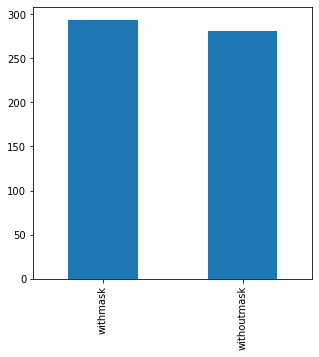

In [11]:
# How many images are there of each breed?
labels_csv["labels"].value_counts().plot.bar(figsize=(5, 5));

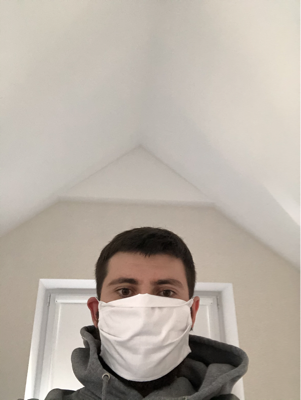

In [13]:
# Let's view an image
Image("FULL_DATA/withmask.0.jpeg")

In [14]:
# Create pathnames from image ID's
filenames = ["FULL_DATA/" + fname for fname in labels_csv["filename"]]

# Check the first 10
filenames[:10]

['FULL_DATA/withmask.48.jpeg',
 'FULL_DATA/withoutmask.8.jpeg',
 'FULL_DATA/withmask.69.jpeg',
 'FULL_DATA/withmask.198.jpeg',
 'FULL_DATA/withmask.203.jpeg',
 'FULL_DATA/withmask.38.jpeg',
 'FULL_DATA/withmask.5.jpeg',
 'FULL_DATA/withmask.249.jpeg',
 'FULL_DATA/withoutmask.153.jpeg',
 'FULL_DATA/withmask.28.jpeg']

FULL_DATA/withmask.48.jpeg


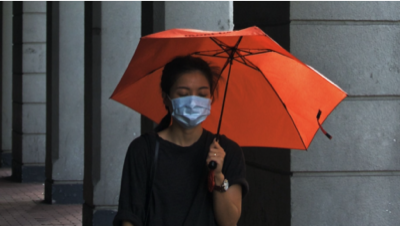

In [22]:
# One more check if the function is working
print(filenames[0])
Image(filenames[0])

In [23]:
labels_csv['filename'][0]

'withmask.0.jpeg'

In [25]:
labels_csv["labels"][0]

'withmask'

In [26]:
filenames[0]

'FULL_DATA/withmask.48.jpeg'

let's prepare our labels.

In [28]:
labels = labels_csv["labels"].to_numpy() 
labels

array(['withmask', 'withoutmask', 'withmask', 'withmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withoutmask', 'withmask',
       'withoutmask', 'withoutmask', 'withoutmask', 'withoutmask',
       'withmask', 'withmask', 'withoutmask', 'withmask', 'withmask',
       'withoutmask', 'withoutmask', 'withoutmask', 'withmask',
       'withoutmask', 'withoutmask', 'withoutmask', 'withmask',
       'withoutmask', 'withmask', 'withmask', 'withmask', 'withoutmask',
       'withoutmask', 'withmask', 'withoutmask', 'withmask',
       'withoutmask', 'withoutmask', 'withoutmask', 'withmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withoutmask',
       'withmask', 'withmask', 'withoutmask', 'withoutmask',
       'withoutmask', 'withoutmask', 'withoutmask', 'withoutmask',
       'withmask', 'withmask', 'withmask', 'withmask', 'withoutmask',
       'withmask', 'withoutmask', 'withmask', 'withoutmask',
       'withoutmask', 'withmask', 'withmask', 'withmask', 'withoutma

In [29]:
len(labels)

575

In [30]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
    print("labels matches number of filenames!")
else:
    print("labels does not match number of filenames")

labels matches number of filenames!


In [31]:
# Find the unique label values
unique_category = np.unique(labels)
len(unique_category)

2

In [32]:
unique_category

array(['withmask', 'withoutmask'], dtype=object)

### Turn label into an array of booleans

In [33]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_category

withmask


array([ True, False])

In [34]:
# Turn every label into a boolean array
boolean_labels = [label == unique_category for label in labels]
boolean_labels[:2]

[array([ True, False]), array([False,  True])]

In [35]:
len(boolean_labels)

575

In [36]:
filenames[:10]

['FULL_DATA/withmask.48.jpeg',
 'FULL_DATA/withoutmask.8.jpeg',
 'FULL_DATA/withmask.69.jpeg',
 'FULL_DATA/withmask.198.jpeg',
 'FULL_DATA/withmask.203.jpeg',
 'FULL_DATA/withmask.38.jpeg',
 'FULL_DATA/withmask.5.jpeg',
 'FULL_DATA/withmask.249.jpeg',
 'FULL_DATA/withoutmask.153.jpeg',
 'FULL_DATA/withmask.28.jpeg']

### Creating our own validation set

In [37]:
# Setup X & y variables
X = filenames
y = boolean_labels

In [38]:
# Let's split data
from sklearn.model_selection import train_test_split

# Into train and valid 
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y, 
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(X_val), len(y_train), len(y_val)

(460, 115, 460, 115)

In [39]:
# Let's show data
X_train[:5],y_train[:5]

(['FULL_DATA/withoutmask.260.jpeg',
  'FULL_DATA/withmask.20.jpeg',
  'FULL_DATA/withmask.24.jpeg',
  'FULL_DATA/withoutmask.170.jpeg',
  'FULL_DATA/withmask.100.jpeg'],
 [array([False,  True]),
  array([ True, False]),
  array([ True, False]),
  array([False,  True]),
  array([ True, False])])

## Preprocessing Images

Befor we do, let's see what image looks like in to tensors

In [40]:
# Convert images to Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(400, 267, 4)

In [41]:
# Convert in to tensor by tf.constant
tf.constant(image)

<tf.Tensor: shape=(400, 267, 4), dtype=float32, numpy=
array([[[0.827451  , 0.7529412 , 0.654902  , 1.        ],
        [0.83137256, 0.7529412 , 0.654902  , 1.        ],
        [0.83137256, 0.7529412 , 0.6666667 , 1.        ],
        ...,
        [0.8509804 , 0.8039216 , 0.69411767, 1.        ],
        [0.8509804 , 0.8039216 , 0.7019608 , 1.        ],
        [0.85490197, 0.8039216 , 0.7019608 , 0.6666667 ]],

       [[0.827451  , 0.7529412 , 0.64705884, 1.        ],
        [0.827451  , 0.7529412 , 0.654902  , 1.        ],
        [0.83137256, 0.75686276, 0.65882355, 1.        ],
        ...,
        [0.8509804 , 0.8039216 , 0.6901961 , 1.        ],
        [0.8509804 , 0.8039216 , 0.69803923, 1.        ],
        [0.85490197, 0.8039216 , 0.69803923, 0.6666667 ]],

       [[0.83137256, 0.75686276, 0.64705884, 1.        ],
        [0.83137256, 0.75686276, 0.6509804 , 1.        ],
        [0.83137256, 0.75686276, 0.65882355, 1.        ],
        ...,
        [0.84313726, 0.8       ,

### TURNING IMAGES INTO TENSOR

A Function for Preprocessing images:
  1. Take an image filepath as input
  2. Use **Tensorflow** to read the file and save it to a variable `image`
  3. Turn our `image` into Tensors
  4. Normalize our image 
  5. Resize the `images` to be a shape of (224,224)
  6. Return the modified `images`

In [42]:
# Define image size
IMG_SIZE = 224

# Function
def process_image(image_path, image_size=IMG_SIZE):
    """
    Takes an image file path and turns the image into a Tensor.
    """
    # Read in an image file
    image = tf.io.read_file(image_path)
    # Turn the jpg image into numerical Tensor with 3 colour channel(RGB)
    image = tf.image.decode_jpeg(image,channels=3)
    # Convert the color channel values to (0-1) values
    image = tf.image.convert_image_dtype(image,tf.float32)
    # Resize the image to (224,224)
    image = tf.image.resize(image, size=[image_size,image_size])

    return image

## Turning our data into Batches

In [43]:
# Create a function to return a tuple (image, label)
def get_image_lable(image_path,label):
    """
    Takes an image file path name and the label,
    processes the image and return a tuple (image, label).
    """
    image = process_image(image_path)

    return image,label

In [44]:
# Define the batch size
BATCH_SIZE = 32

# Function to convert data into batches
def create_data_batches(X,y=None, batch_size=BATCH_SIZE,valid_data=False):
    """
    Creates batches of data of image (X) and label (y) pairs.
    Shuffle the data if it's training data but doesn't shuffle if it's validation data.
    """
    # If data is valid dataset (NO SHUFFLE)
    if valid_data:
        print("Creating valid data batches.........")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        data_batch = data.map(get_image_lable).batch(batch_size)
        return data_batch

    else:
        print("Creating train data batches.........")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        # Shuffling pathname and labels before mapping image processor fun
        data = data.shuffle(buffer_size=len(X))
        data_batch = data.map(get_image_lable).batch(batch_size)

        return data_batch

In [45]:
# Creat training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating train data batches.........
Creating valid data batches.........


In [46]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.bool, name=None)))

We can see that the data is now processed into 224x244 and the color channel is 3 which is color image.

## Visualizing Data Batches

In [47]:
# Create fun for viewing in a data batch
def show_images(images, labels):
    """
    Displays a plot of 25 images and their labels from a data batch.
    """
    plt.figure(figsize=(20, 20))
    for i in range(25):
        # Subplot
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(unique_category[labels[i].argmax()])
        plt.axis("Off")

In [48]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.54494274, 0.4311669 , 0.23513876],
          [0.57094276, 0.4454526 , 0.26113886],
          [0.58275783, 0.45726764, 0.27162993],
          ...,
          [0.42682514, 0.36076683, 0.22987571],
          [0.62021625, 0.5437325 , 0.39189646],
          [0.73931855, 0.664544  , 0.52271533]],
 
         [[0.59432554, 0.471503  , 0.28452164],
          [0.5997396 , 0.4759104 , 0.2895746 ],
          [0.5981793 , 0.4731421 , 0.28430498],
          ...,
          [0.41521364, 0.34809613, 0.22156428],
          [0.6151195 , 0.5382485 , 0.3810465 ],
          [0.76095504, 0.685165  , 0.5302696 ]],
 
         [[0.60318196, 0.48082328, 0.28581497],
          [0.62503725, 0.4975972 , 0.30369836],
          [0.63053226, 0.5012605 , 0.30534184],
          ...,
          [0.43840823, 0.37682733, 0.24976368],
          [0.62517285, 0.5449099 , 0.38053444],
          [0.7852591 , 0.69666713, 0.52205664]],
 
         ...,
 
         [[0.3431155 , 0.48048636, 0.884408  ],
          [0.31144

In [49]:
len(train_images), len(train_labels)

(32, 32)

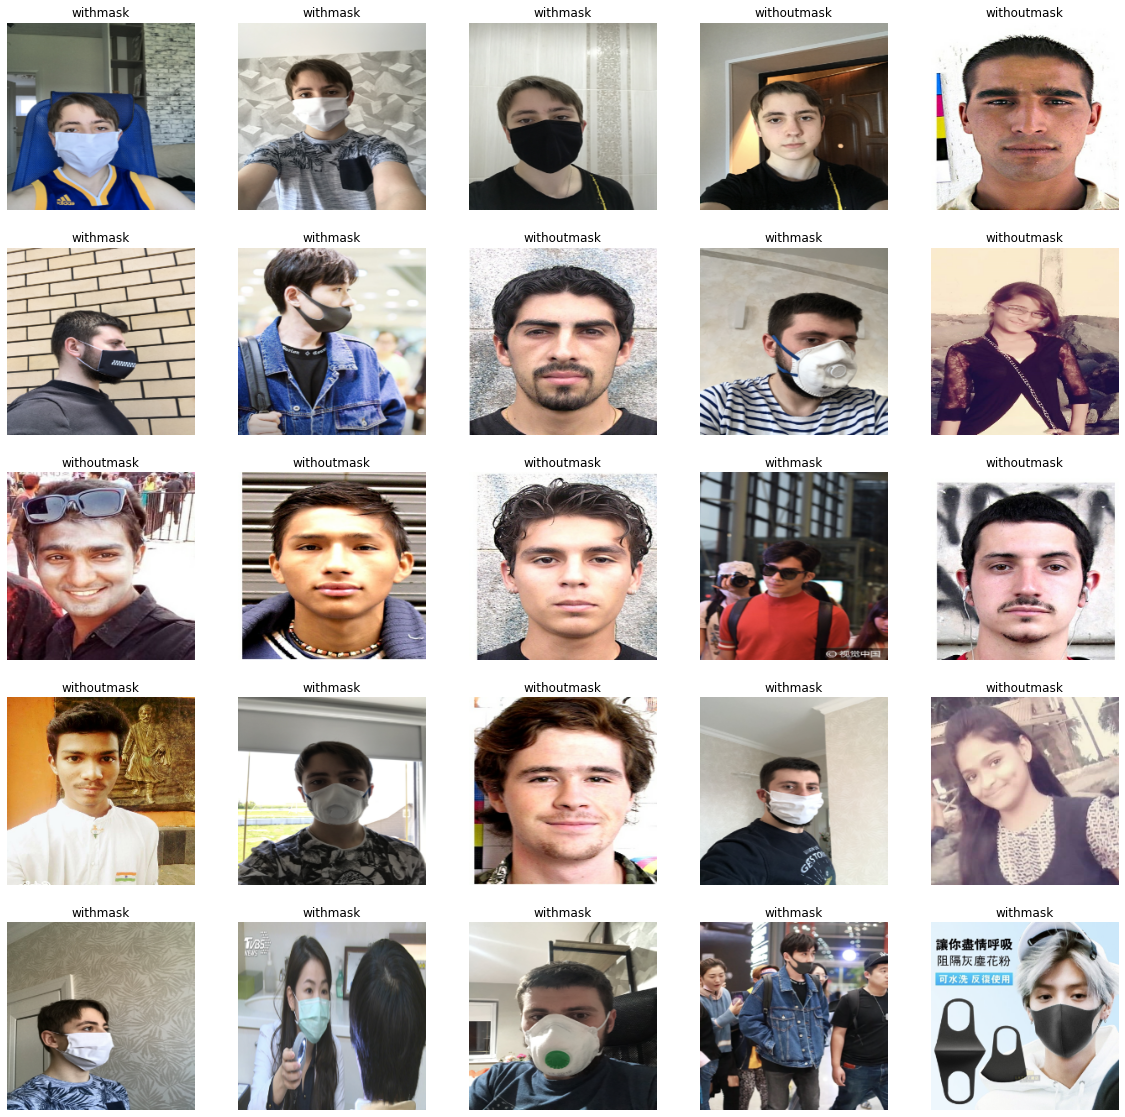

In [50]:
# let's show data
train_images, train_labels = next(train_data.as_numpy_iterator())
show_images(train_images,train_labels)

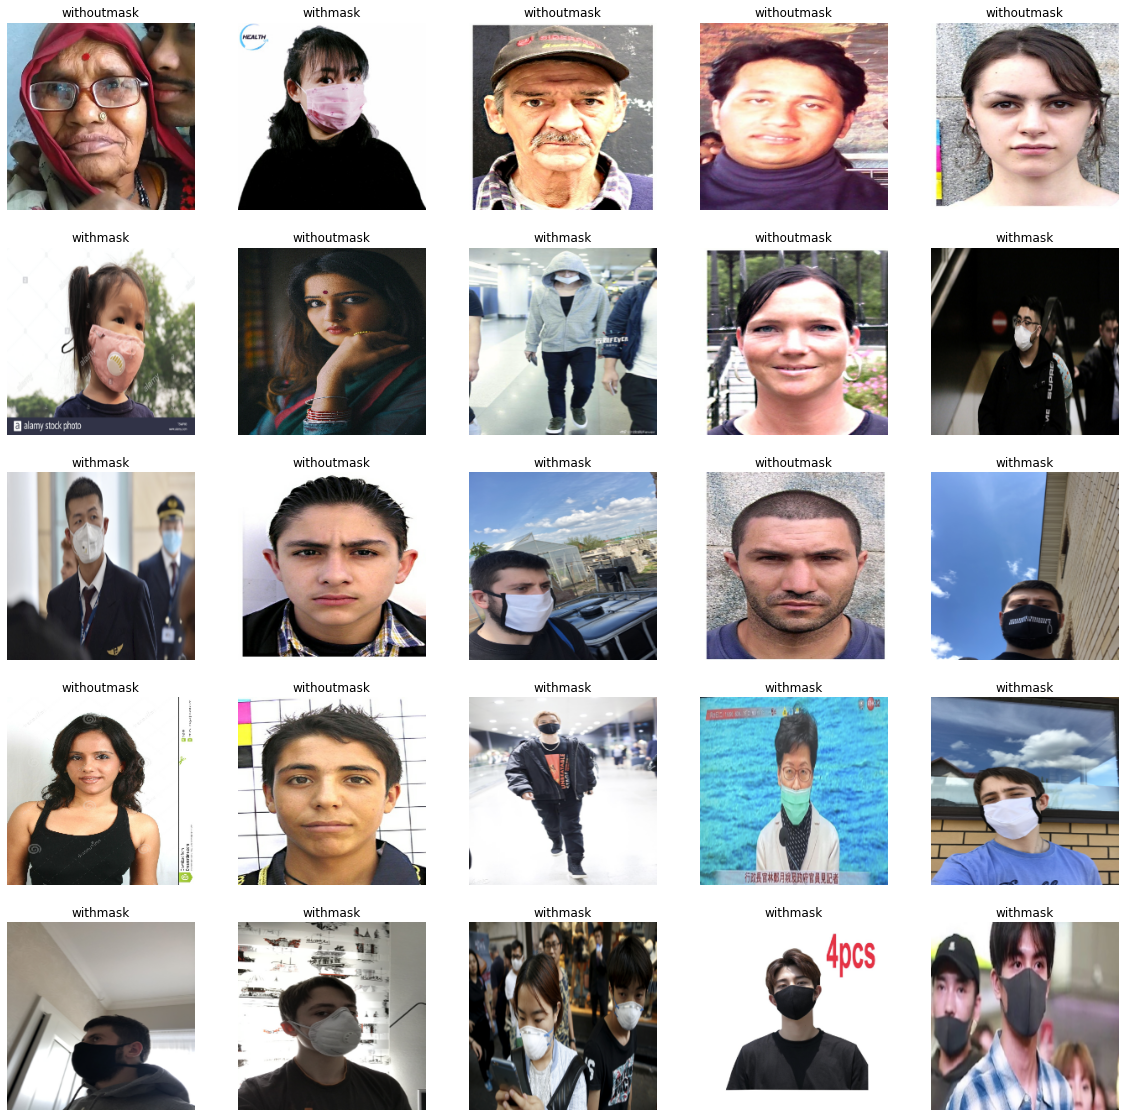

In [51]:
# For valid data
val_images, val_labels = next(val_data.as_numpy_iterator())
show_images(val_images, val_labels)

## Building a model 

In [52]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # Batch, height, width, Colour_chanels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_category)

# Setup model URL
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [53]:
# Create a fun to build a keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with:", model_url)

    # Setup the model
    model = tf.keras.Sequential([
                                   hub.KerasLayer(model_url),
                                   tf.keras.layers.Dense(units=output_shape, 
                                                         activation="softmax")
      ])

    # Compile the model
    model.compile(
          loss = tf.keras.losses.BinaryCrossentropy(),
          optimizer = tf.keras.optimizers.Adam(),
          metrics = ["accuracy"]
      )

    # Build the model
    model.build(input_shape)

    return model

In [54]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  2004      
Total params: 5,434,717
Trainable params: 2,004
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

### Early stopping callback

In [55]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience = 3)

## Training a model

In [56]:
NUM_EPOCHS = 25

In [57]:
# Build a function to train and return a trained model
def train_model():
    #tensorboard = create_tensorboard_callback()
  
    # Fit the model
    model.fit(x=train_data,
                epochs= NUM_EPOCHS,
                validation_data=val_data,
                validation_freq = 1,
                callbacks=[early_stopping])

    return model

In [68]:
# Fit the data
model = train_model()

Epoch 1/25
15/15 [==============================] - 14s 952ms/step - loss: 0.2647 - accuracy: 0.8913 - val_loss: 0.0441 - val_accuracy: 0.9913
Epoch 2/25
15/15 [==============================] - 13s 858ms/step - loss: 0.0310 - accuracy: 0.9891 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 3/25
15/15 [==============================] - 14s 955ms/step - loss: 0.0149 - accuracy: 0.9978 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 4/25
15/15 [==============================] - 14s 930ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 5/25
15/15 [==============================] - 14s 927ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 1.0000


## Making and evaluating prediction using a trained model

In [69]:
# Make prediction on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)
predictions

4/4 [==============================] - 2s 534ms/step


array([[9.74001348e-01, 2.59987079e-02],
       [9.99277413e-01, 7.22561905e-04],
       [9.99301434e-01, 6.98512478e-04],
       [1.87730289e-03, 9.98122633e-01],
       [9.95595515e-01, 4.40450385e-03],
       [9.99869704e-01, 1.30255445e-04],
       [9.99963880e-01, 3.61438979e-05],
       [9.99999285e-01, 7.54938981e-07],
       [9.97002780e-01, 2.99725425e-03],
       [9.99986291e-01, 1.36632571e-05],
       [6.40084792e-04, 9.99359906e-01],
       [3.13801318e-03, 9.96862054e-01],
       [9.90680277e-01, 9.31975059e-03],
       [5.21943866e-06, 9.99994755e-01],
       [2.45666539e-04, 9.99754369e-01],
       [9.19151498e-05, 9.99908090e-01],
       [9.97723162e-01, 2.27684854e-03],
       [9.99934435e-01, 6.55372132e-05],
       [9.99974847e-01, 2.51833571e-05],
       [9.99971747e-01, 2.82322981e-05],
       [9.99979496e-01, 2.05424531e-05],
       [9.92810667e-01, 7.18927989e-03],
       [6.75897580e-04, 9.99324083e-01],
       [9.91062522e-01, 8.93747807e-03],
       [9.982898

In [70]:
predictions.shape

(115, 2)

In [71]:
np.sum(predictions[0])

1.0

In [58]:
def make_prediction(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label.
    """

    return unique_category[np.argmax(prediction_probabilities)]

In [73]:
pred_label = make_prediction(predictions[17])
pred_label

'withmask'

In [74]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 2)), types: (tf.float32, tf.bool)>

In [75]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
    """
    Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
    of images and labels.
    """
    images = []
    labels = []
    # Loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_category[np.argmax(label)])
    return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.8970589 , 0.9127452 , 0.9245099 ],
         [0.8980393 , 0.91372555, 0.92549026],
         [0.89607847, 0.9111673 , 0.9235295 ],
         ...,
         [0.90490204, 0.9127452 , 0.90216   ],
         [0.9029412 , 0.91078436, 0.9068628 ],
         [0.8898132 , 0.8976563 , 0.89373475]],
 
        [[0.8970589 , 0.9127452 , 0.9245099 ],
         [0.900429  , 0.9161153 , 0.92788   ],
         [0.89607847, 0.9088236 , 0.9235295 ],
         ...,
         [0.90549946, 0.9133426 , 0.90533096],
         [0.9023438 , 0.91018695, 0.9062654 ],
         [0.8927544 , 0.9005975 , 0.89667594]],
 
        [[0.8970589 , 0.9127452 , 0.9245099 ],
         [0.90194553, 0.9176318 , 0.9293965 ],
         [0.89514405, 0.91078436, 0.92549026],
         ...,
         [0.90690875, 0.91470593, 0.9109222 ],
         [0.89901966, 0.9068628 , 0.9029412 ],
         [0.89701295, 0.9048561 , 0.9009345 ]],
 
        ...,
 
        [[0.77555156, 0.77163   , 0.79123783],
         [0.7765166 , 0.77259505, 0.79220

In [59]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the prediction, ground truth and image for sample n
    """
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

    # Get the pred label
    pred_label = make_prediction(pred_prob)

    # Plot image & remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # Change the colour of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Change plot title to be predicted, probability of prediction and truth label
    plt.title("{} {:2.0f}% {}".format(pred_label,
                                        np.max(pred_prob)*100,
                                        true_label),
                                        color=color)

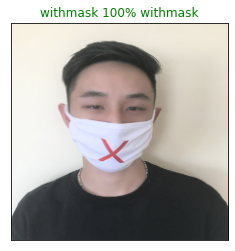

In [79]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=20)

In [60]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    
    """
    Plus the top 10 highest prediction confidences along with the truth label for sample n.
    """
    pred_prob, true_label = prediction_probabilities[n], labels[n]

    # Get the predicted label
    pred_label = make_prediction(pred_prob)

    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    # Find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # Find the top 10 prediction labels
    top_10_pred_labels = unique_category[top_10_pred_indexes]

    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                         top_10_pred_values,
                         color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
                 labels=top_10_pred_labels,
                 rotation="vertical")

    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

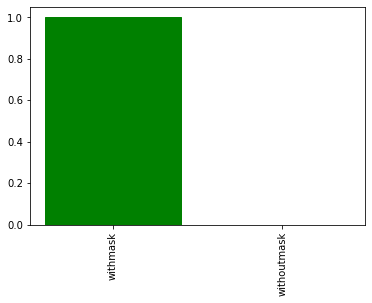

In [81]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

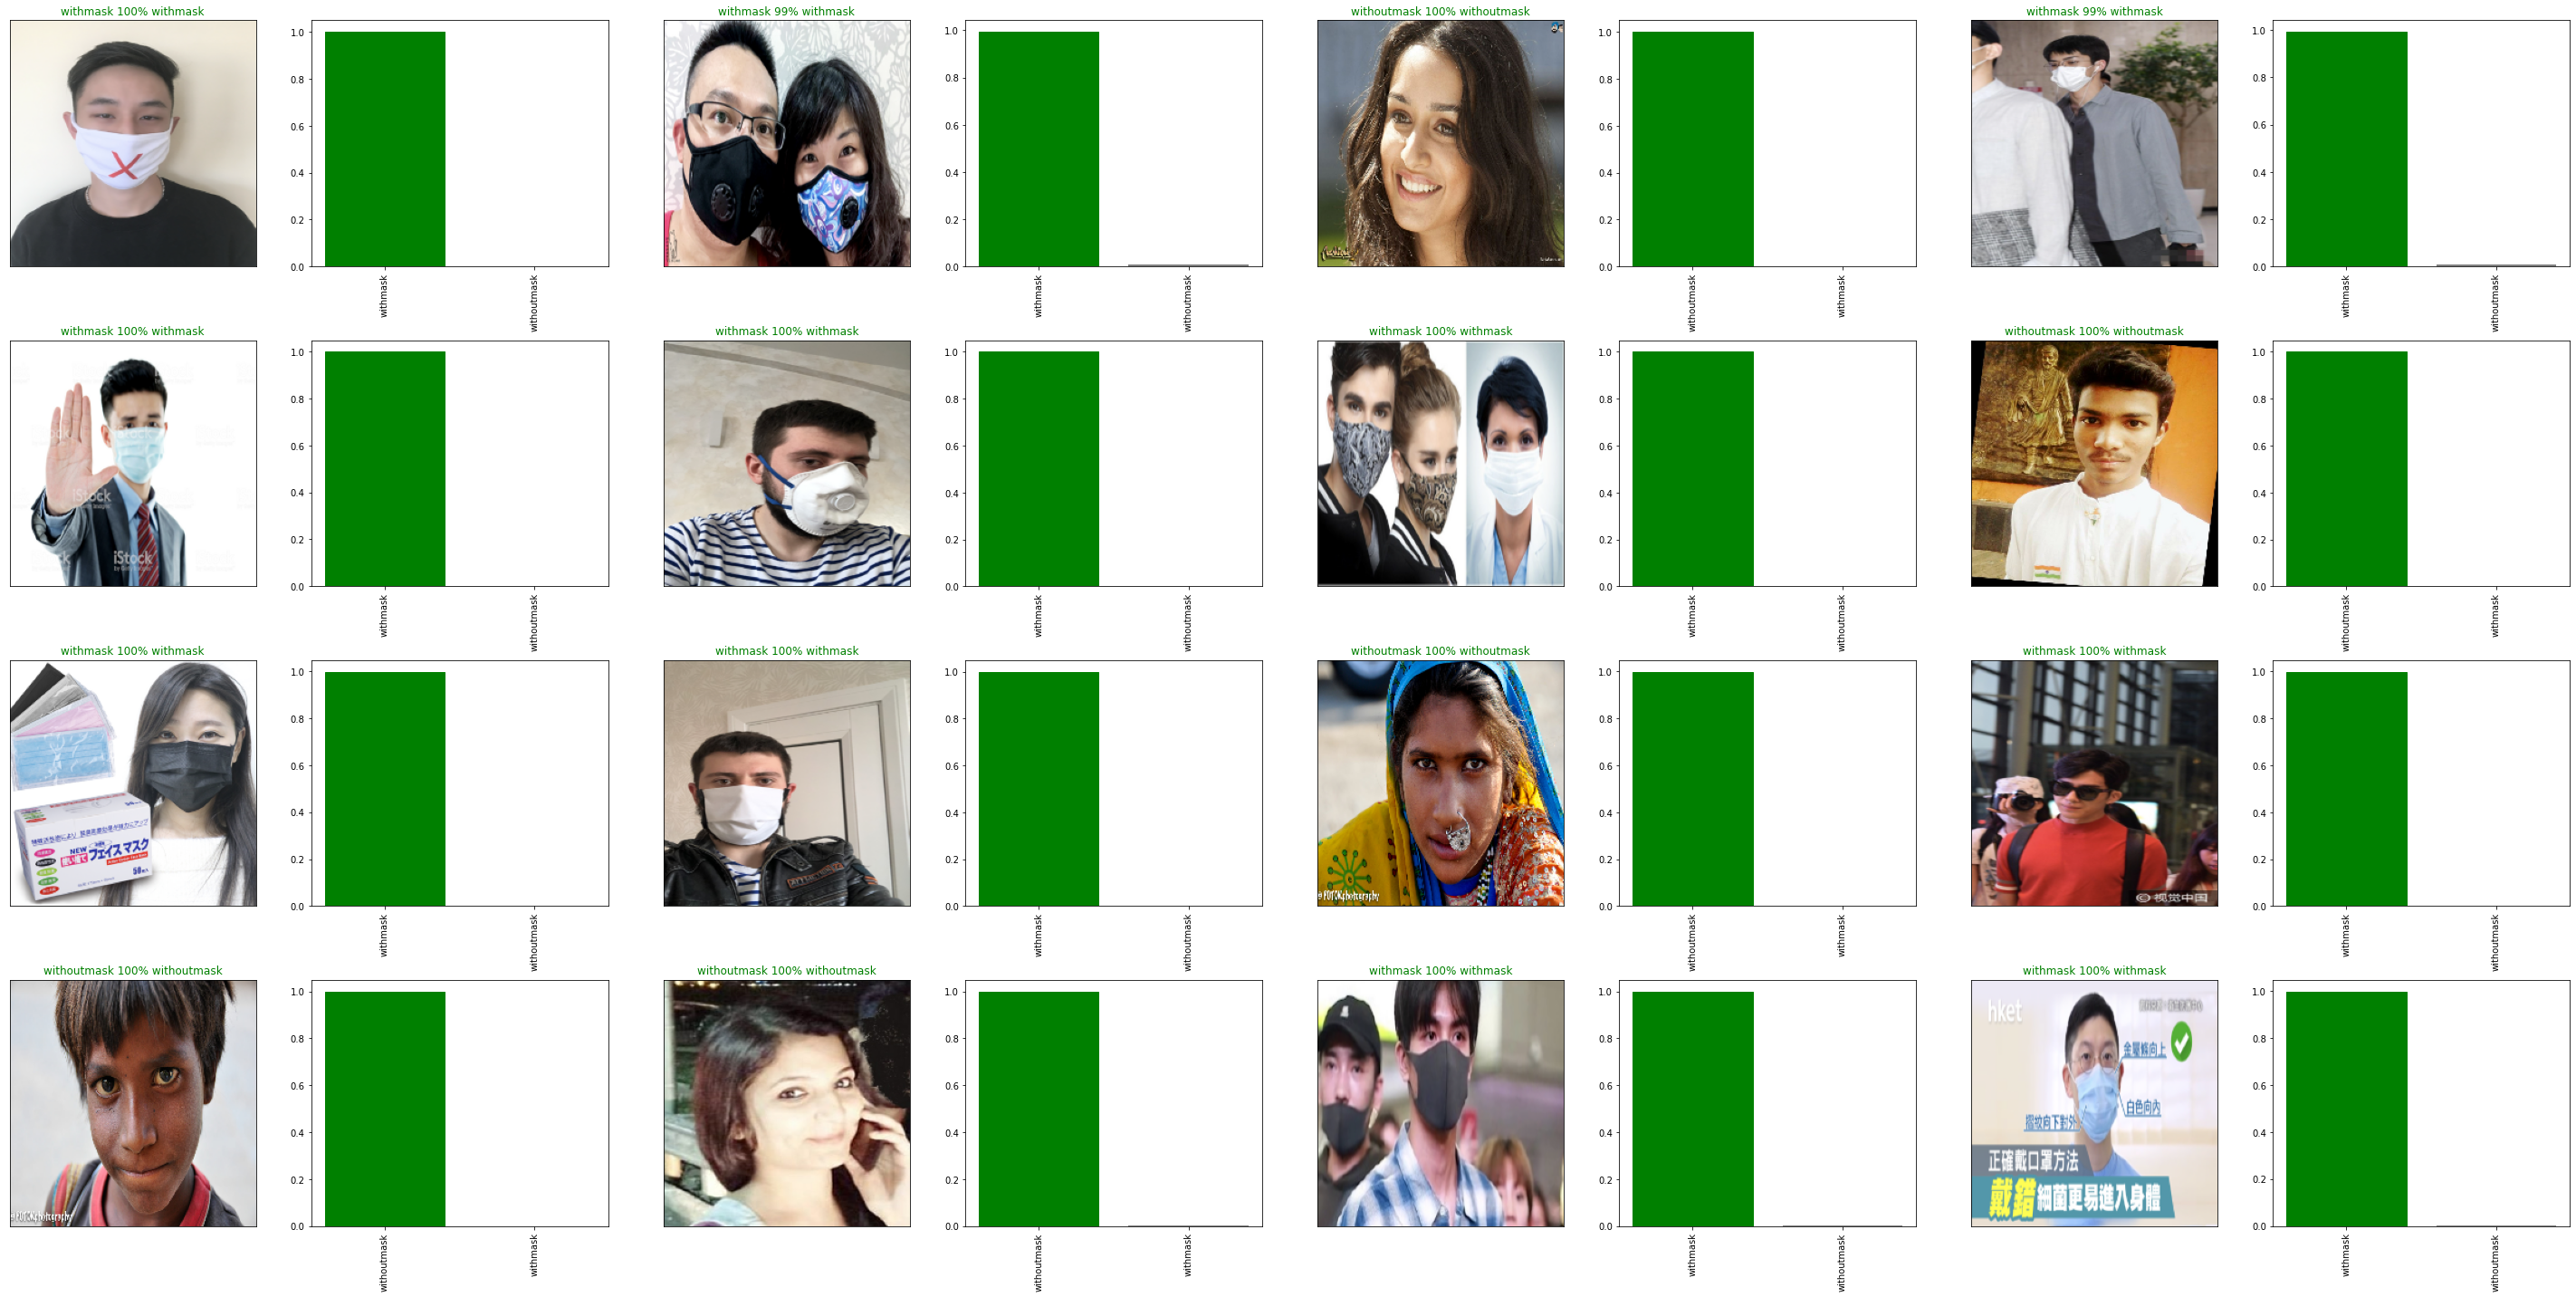

In [82]:
# Let's check out a few predictions and their different values
i_multiplier = 20
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [83]:
# Create a function to save a model
def save_model(model, suffix=None):
    """
    Saves a given model in a models directory and appends a suffix (string).
    """
    # Create a model directory pathname with current time
    modeldir = "model/"
    model_path = modeldir + "-" + suffix + ".h5" # save format of model
    print(f"Saving model to: {model_path}...")
    model.save(model_path)
    return model_path

In [84]:
# Save our model trained on 1000 images
save_model(model, suffix="mobilenetv2-Adam")

Saving model to: model/-mobilenetv2-Adam.h5...


'model/-mobilenetv2-Adam.h5'

In [63]:
# Loading the model
from tensorflow.keras.models import load_model

model = load_model('model/-mobilenetv2-Adam.h5', custom_objects={"KerasLayer": hub.KerasLayer})

In [64]:
# Evaluate the pre-saved model
model.evaluate(val_data)

4/4 [==============================] - 15s 4s/step - loss: 0.0099 - accuracy: 1.0000


[0.009940140414983034, 1.0]

## Predict on custom data

In [65]:
def test_data(path):
    demo = imread(path)
    demo = tf.image.convert_image_dtype(demo,tf.float32)
    demo = tf.image.resize(demo,size=[224,224])
    demo = np.expand_dims(demo,axis=0)

    pred = model.predict(demo)
    result = unique_category[np.argmax(pred)]

    return result

TEST1
![image](test1.jpg)

In [74]:
test_data('test1.jpg')

'withmask'

TEST2
![image](test2.jpg)

In [75]:
test_data('test2.jpg')

'withmask'

TEST3
![image](test3.jpg)

In [76]:
test_data('test3.jpg')

'withoutmask'